### Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Data Loading

In [5]:
df=pd.read_csv("Dataset.csv")
df=df[["State","Season","Crop","Area","Rainfall"]]
df.head()

,State,Season,Crop,Area,Rainfall
0,Andaman and Nicobar Islands,Kharif,Arecanut,1254.0,3050.8
1,Andaman and Nicobar Islands,Kharif,Other Kharif pulses,2.0,3050.8
2,Andaman and Nicobar Islands,Kharif,Rice,102.0,3050.8
3,Andaman and Nicobar Islands,Whole Year,Banana,176.0,3076.3
4,Andaman and Nicobar Islands,Whole Year,Cashewnut,720.0,3076.3


In [6]:
df.shape

(18731, 5)

In [7]:
df.isnull().sum()

State       0
Season      0
Crop        1
Area        2
Rainfall    1
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18731 entries, 0 to 18730
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     18731 non-null  object 
 1   Season    18731 non-null  object 
 2   Crop      18730 non-null  object 
 3   Area      18729 non-null  float64
 4   Rainfall  18730 non-null  float64
dtypes: float64(2), object(3)
memory usage: 731.8+ KB


### Removing outliers in Area feature

In [10]:
low_outliers = df["Area"].quantile(0.1)
high_outliers  = df["Area"].quantile(0.90)

df = df[(df["Area"] < high_outliers) & (df["Area"] > low_outliers)]
df = df.reset_index(drop=True)

In [11]:
ax=df["State"].value_counts().plot.pie(figsize=(18,8),cmap = cm.get_cmap('Spectral'))

In [12]:
ax=df["Season"].value_counts(ascending=True).plot.barh(figsize=(18,8),cmap = cm.get_cmap('plasma'))

In [13]:
ax=df["Crop"].value_counts().plot.bar(figsize=(22,8),cmap = cm.get_cmap('viridis'))

### Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
features=["State","Season","Crop"]
for feature in features:
    df[feature] = labelencoder.fit_transform(df[feature])

In [16]:
df.head()

,State,Season,Crop,Area,Rainfall
0,0,1,0,1254.0,3050.8
1,0,1,36,102.0,3050.8
2,0,4,3,176.0,3076.3
3,0,4,7,720.0,3076.3
4,0,4,13,36.0,3076.3


In [17]:
data=df.copy()

### Clustering

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42).fit(df)
df["label"]=kmeans.labels_

In [20]:
df.head()

,State,Season,Crop,Area,Rainfall,label
0,0,1,0,1254.0,3050.8,2
1,0,1,36,102.0,3050.8,2
2,0,4,3,176.0,3076.3,2
3,0,4,7,720.0,3076.3,2
4,0,4,13,36.0,3076.3,2


In [21]:
df["label"].value_counts()

label
2    7725
0    4632
1    1791
3     816
Name: count, dtype: int64

In [22]:
class_0=df.loc[df["label"]==0]
print("class 0 production meadian value",np.median(class_0["Area"]))

class 0 production meadian value 421.0


In [23]:
class_1=df.loc[df["label"]==1]
print("class 1 production meadian value",np.median(class_1["Area"]))

class 1 production meadian value 4203.0


In [24]:
class_2=df.loc[df["label"]==2]
print("class 2 production meadian value",np.median(class_2["Area"]))

class 2 production meadian value 180.0


In [25]:
class_3=df.loc[df["label"]==3]
print("class 3 production meadian value",np.median(class_3["Area"]))

class 3 production meadian value 9481.5


In [26]:
class_names={0:"Poor",3:"Average",2:"Good",1:"Very Good"}

In [27]:
df=df.sample(frac=1).reset_index(drop=True)

In [28]:
X=df.drop(labels="label",axis=1)
y=df["label"]

In [29]:
X.head()

,State,Season,Crop,Area,Rainfall
0,1,4,12,60.0,3076.3
1,1,2,49,475.0,1215.2
2,2,2,4,285.0,1215.2
3,1,4,13,155.0,3076.3
4,2,1,22,8227.0,3050.8


In [30]:
y.head()

0    2
1    0
2    0
3    2
4    3
Name: label, dtype: int32

### Data Splitting

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Model-1: KNeighborsClassifier

In [34]:
from sklearn.neighbors import KNeighborsClassifier
KNC_model=KNeighborsClassifier()
KNC_model.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
KNC_predictions=KNC_model.predict(X_test)

In [36]:
print(KNC_predictions)

[2 2 2 ... 0 2 1]


### Result Analysis

#### Accuracy Score

In [39]:
KNC_accuracy=accuracy_score(y_test,KNC_predictions)
print("KNeighborsClassifier model accuracy is {:.2f}%".format(KNC_accuracy*100.0))

KNeighborsClassifier model accuracy is 100.00%


#### Classification Report

In [41]:
print(classification_report(y_test,KNC_predictions,target_names=["Poor","Very Good","Good","Average"]))

              precision    recall  f1-score   support

        Poor       1.00      1.00      1.00       972
   Very Good       1.00      1.00      1.00       347
        Good       1.00      1.00      1.00      1532
     Average       1.00      1.00      1.00       142

    accuracy                           1.00      2993
   macro avg       1.00      1.00      1.00      2993
weighted avg       1.00      1.00      1.00      2993



#### Confusion Matrix

In [43]:
!pip install mlxtend


In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


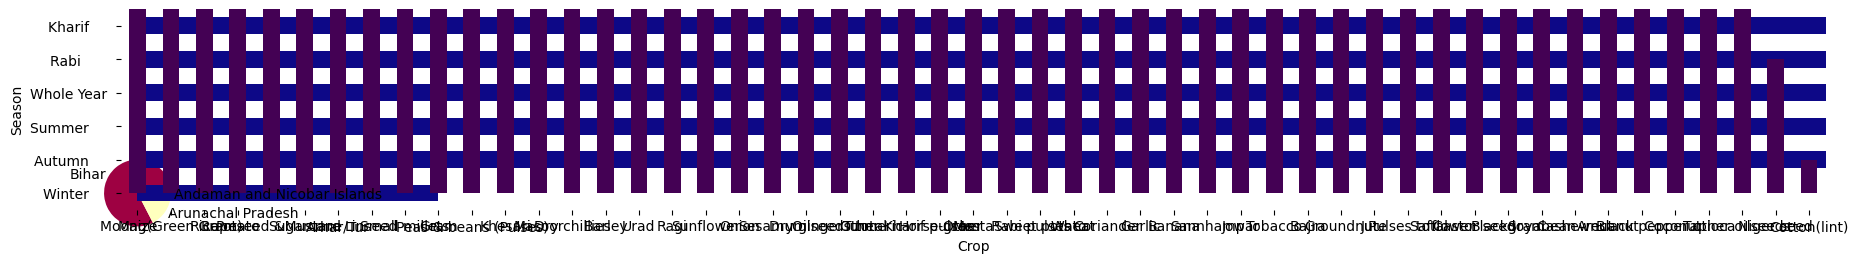

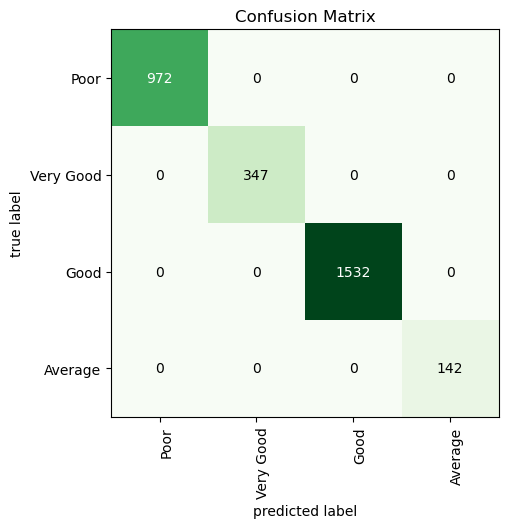

In [45]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_test,KNC_predictions),
                        class_names=["Poor","Very Good","Good","Average"],
                        figsize=(5,10),
                        cmap=plt.cm.Greens)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

### Model Saving

In [47]:
import pickle
with open(file="model/KNeighborsClassifier_model.pkl",mode="wb") as file:
    pickle.dump(obj=KNC_model,file=file)

### Model-2 RidgeClassifier

In [49]:
from sklearn.linear_model import RidgeClassifier
RC_model=RidgeClassifier()
RC_model.fit(X_train,y_train)

RidgeClassifier()

In [50]:
RC_pred=RC_model.predict(X_test)
print(RC_pred)

[2 2 2 ... 0 2 0]


### Result Analysis

***Accuracy Score***

In [53]:
RC_accuracy=accuracy_score(y_test,RC_pred)
print("RidgeClassifier model accuracy is {:.2f}%".format(RC_accuracy*100.0))

RidgeClassifier model accuracy is 88.84%


***Classification Report***

In [55]:
print(classification_report(y_test,RC_pred,target_names=["Poor","Very Good","Good","Average"]))

              precision    recall  f1-score   support

        Poor       0.84      1.00      0.91       972
   Very Good       1.00      0.06      0.11       347
        Good       0.92      1.00      0.96      1532
     Average       0.90      0.95      0.92       142

    accuracy                           0.89      2993
   macro avg       0.92      0.75      0.73      2993
weighted avg       0.90      0.89      0.84      2993



***Confusion Matrix***

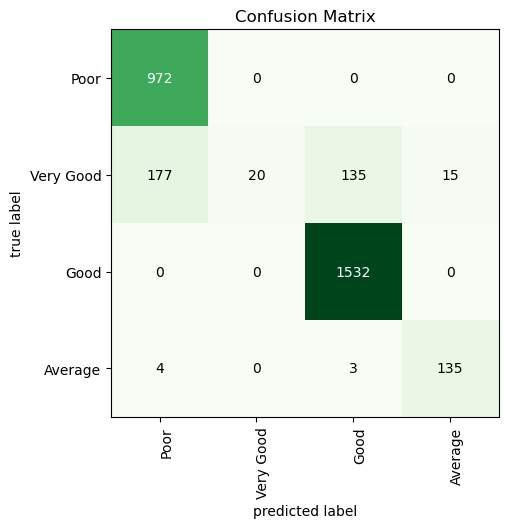

In [57]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_test,RC_pred),
                        class_names=["Poor","Very Good","Good","Average"],
                        figsize=(5,10),
                        cmap=plt.cm.Greens)
plt.title(label="Confusion Matrix")
plt.xticks(rotation=90)
plt.show()

***Model Saving***

In [59]:
import pickle
with open(file="model/RidgeClassifier_model.pkl",mode="wb") as file:
    pickle.dump(obj=RC_model,file=file)

----

# Rainfall Prediction

In [62]:
data=data[["State","Season","Rainfall"]]
data.head()

,State,Season,Rainfall
0,0,1,3050.8
1,0,1,3050.8
2,0,4,3076.3
3,0,4,3076.3
4,0,4,3076.3


In [63]:
X=data[["State","Season"]]
y=data["Rainfall"]

In [64]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

(11971, 2) (2993, 2) (11971,) (2993,)


### Model

In [66]:
from sklearn.ensemble import RandomForestRegressor
RFR_model=RandomForestRegressor()
RFR_model.fit(train_X,train_y)

RandomForestRegressor()

In [67]:
RFR_pred=RFR_model.predict(test_X)
print(RFR_pred)

[1215.2 3050.8 3050.8 ... 3050.8 1215.2 3050.8]


In [68]:
res_df=pd.DataFrame()
res_df["True_values"]=test_y
res_df["Pred_values"]=RFR_pred
res_df=res_df.reset_index(drop=True)
res_df.head()

,True_values,Pred_values
0,1215.2,1215.2
1,3050.8,3050.8
2,3050.8,3050.8
3,3076.3,3076.3
4,3050.8,3050.8


In [69]:
from sklearn.metrics import r2_score
print("R2_score is {:.2f}%".format(r2_score(test_y,RFR_pred)*100.0))

R2_score is 100.00%


In [70]:
res_df.head(200).plot(figsize=(18,8))
plt.title(label="Predicted vs True values")
plt.xlabel(xlabel='Number of records')

Text(0.5, 0, 'Number of records')

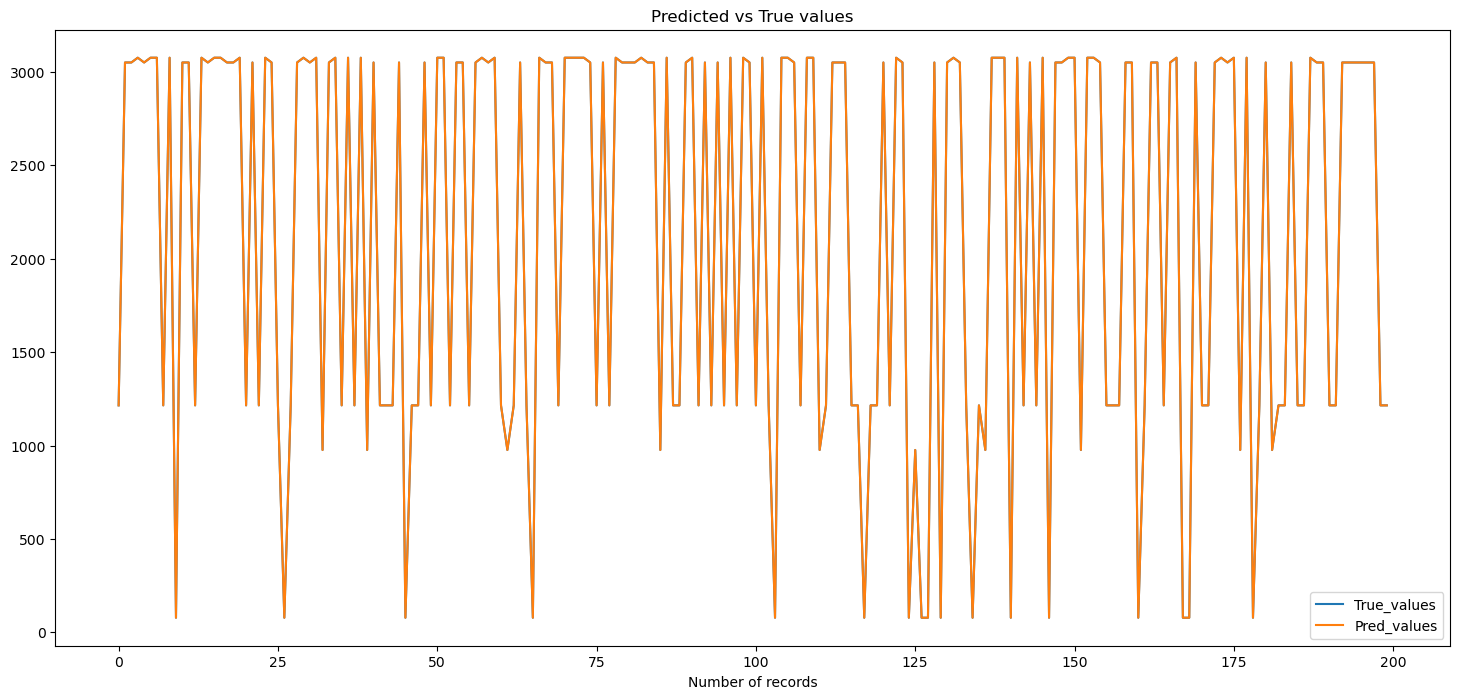

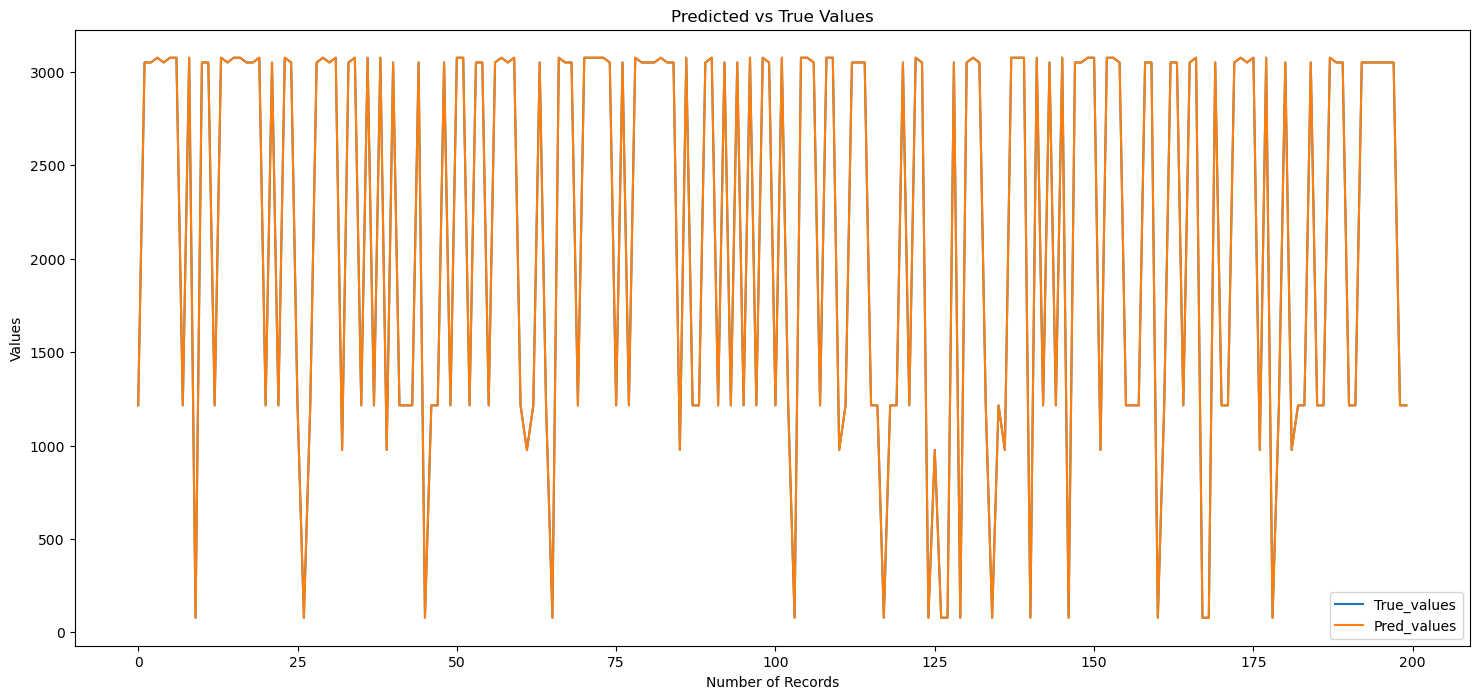

In [71]:
import matplotlib.pyplot as plt

res_df.head(200).plot(figsize=(18, 8))

plt.title("Predicted vs True Values")  # Correct title format
plt.xlabel("Number of Records")        # Correct xlabel syntax
plt.ylabel("Values")                    # Add ylabel for better visualization

plt.show()  # Display the plot


In [72]:
import pickle
with open(file="model/RandomForestRegressor_model.pkl",mode="wb") as file:
    pickle.dump(obj=RFR_model,file=file)

## Thank You